### ALP-induced Signal simulation


In [1]:
import os
import sys
print(os.path.abspath(os.curdir))
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder
print(os.path.abspath(os.curdir))
sys.path.insert(0, os.path.abspath(os.curdir))


c:\Users\zhenf\D\Yu0702\NMR-simulator\Tests\20250402-Simulations-of-ALP-field
c:\Users\zhenf\D\Yu0702\NMR-simulator


In [2]:
import numpy as np
import time
from SimuTools import Sample, MagField, Simulation
from functioncache import check

In [3]:
ExampleSample10MHzT = Sample(
    name="TestSample",  # name of the atom/molecule
    gyroratio=2
    * np.pi
    * (10)
    * 1e6,  # [Hz/T]. Remember input it like 2 * np.pi * 11.777*10**6
    numofnuclei=1,  #
    tempunit="K",  # temperature scale
    T2=1000,  # [s]
    T1=10000,  # [s]
    pol=1,
    verbose=False,
)

In [4]:
ALP_Field_grad = MagField(name="ALP field gradient")  # excitation field in the rotating frame

In [5]:
simu = Simulation(
    name="TestSample 10MHzT",
    sample=ExampleSample10MHzT,  # class Sample
    # gyroratio=(2*np.pi)*11.777*10**6,  # [Hz/T]
    init_time=0.0,  # [s]
    station=None,
    init_mag_amp=1.0,
    init_M_theta=0.0,  # [rad]
    init_M_phi=0.0,  # [rad]
    demodfreq=1e6,
    B0z=(1e6) / (ExampleSample10MHzT.gyroratio / (2 * np.pi)),  # [T]
    simuRate=(6696.42871094),  #
    duration=10,
    excField=ALP_Field_grad,
    verbose=False,
)

In [6]:
tic = time.perf_counter()
simu.excField.setALP_Field(
    method='time-interfer',
        timeStamp=simu.timeStamp,
        Brms=1e-15,  # RMS amplitude of the pseudo-magnetic field in [T]
        nu_a=(-0.5),  # frequency in the rotating frame
        # direction: np.ndarray,  #  = np.array([1, 0, 0])
        use_stoch=False,
        demodfreq=simu.demodfreq,
        makeplot=False)
simu.excType = "ALP"
toc = time.perf_counter()
print(f"setALP_Field() time consumption = {toc-tic:.3f} s")

setALP_Field() time consumption = 67.845 s


In [7]:
tic = time.perf_counter()
simu.GenerateTrajectory(verbose=False)
toc = time.perf_counter()
print(f"GenerateTrajectory time consumption = {toc-tic:.3f} s")

GenerateTrajectory time consumption = 0.044 s


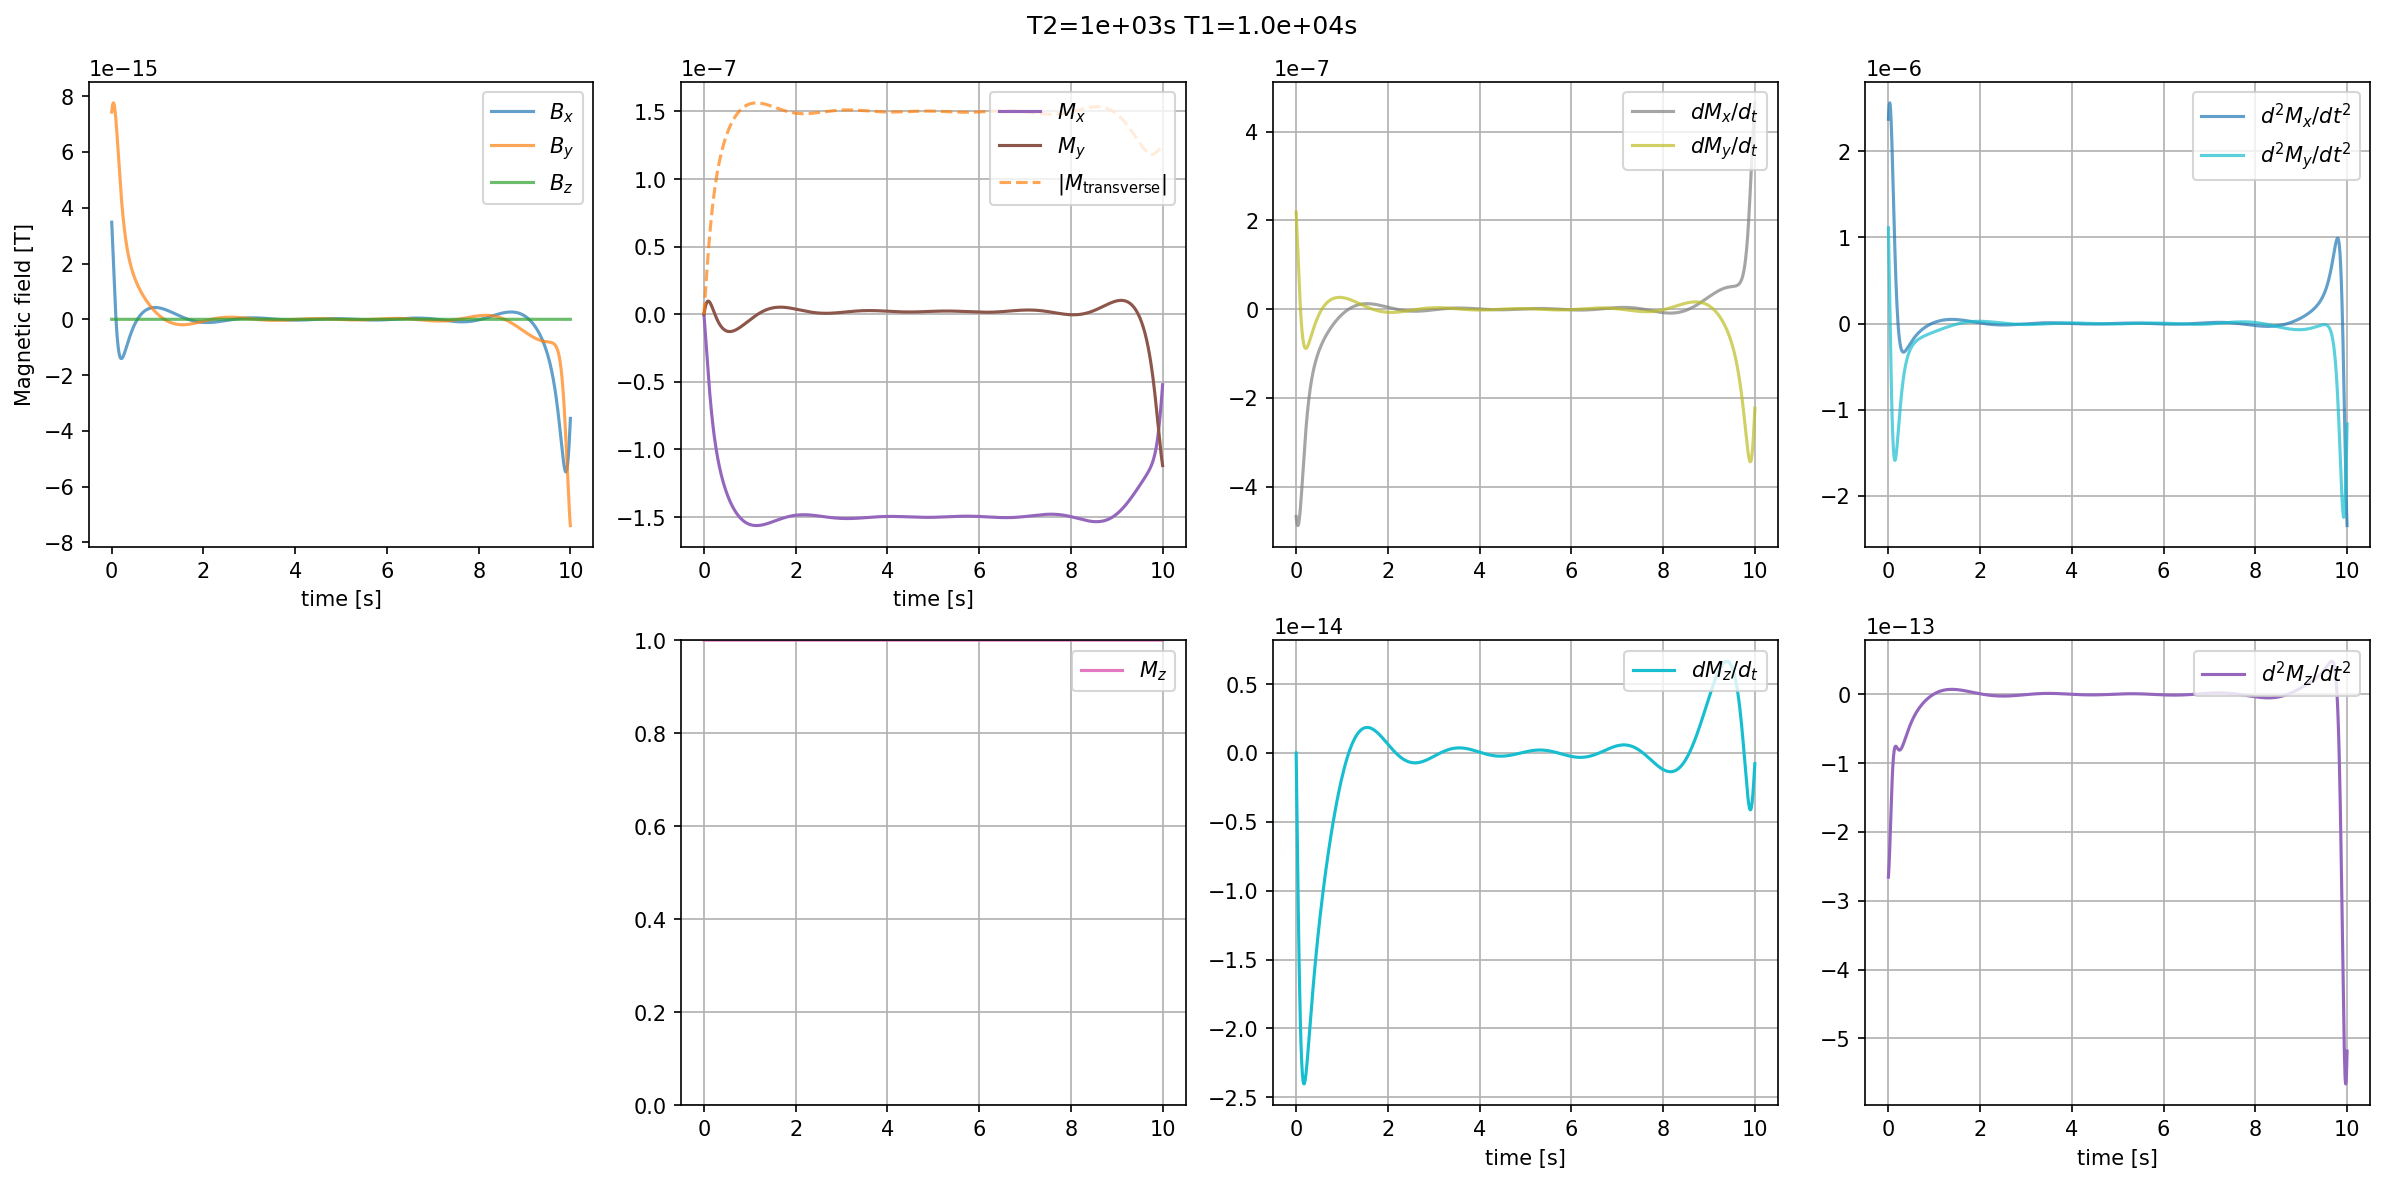

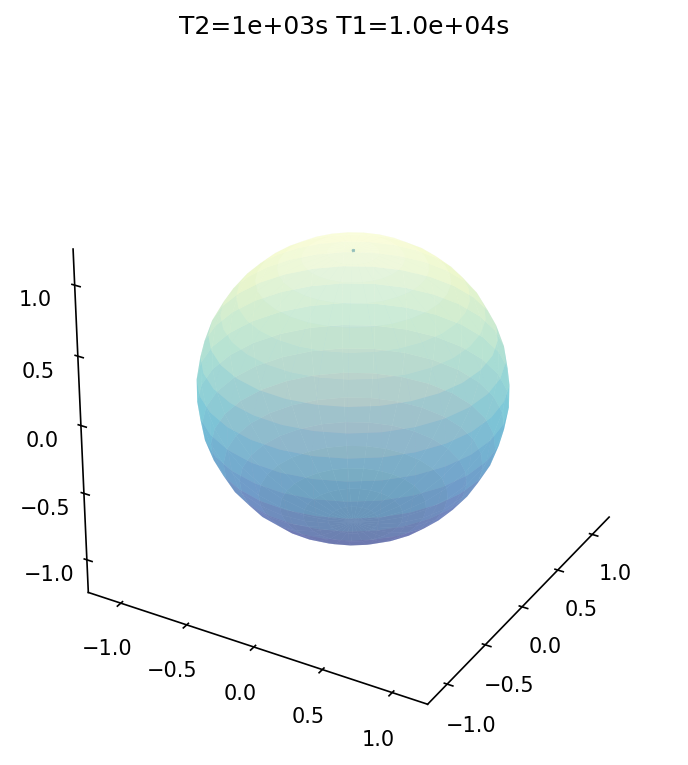

In [8]:
simu.MonitorTrajectory(plotrate=133, verbose=True)
simu.VisualizeTrajectory3D(
    plotrate=1e3,  # [Hz]
    # rotframe=True,
    verbose=False,
)

C:\Users\zhenf\AppData\Local\Temp\ipykernel_43588\4218238508.py line 2 tau_a : float64(1.00000050000025) [shape=()]
C:\Users\zhenf\AppData\Local\Temp\ipykernel_43588\4218238508.py line 3 1/(np.pi * np.sqrt(simu.sample.T2 * tau_a)) : float64(0.010065839904436488) [shape=()]
c:\Users\zhenf\D\Yu0702\NMR-simulator\DataAnalysis.py line 4121 chunk_list : range(range(0, 1)) [len=1]


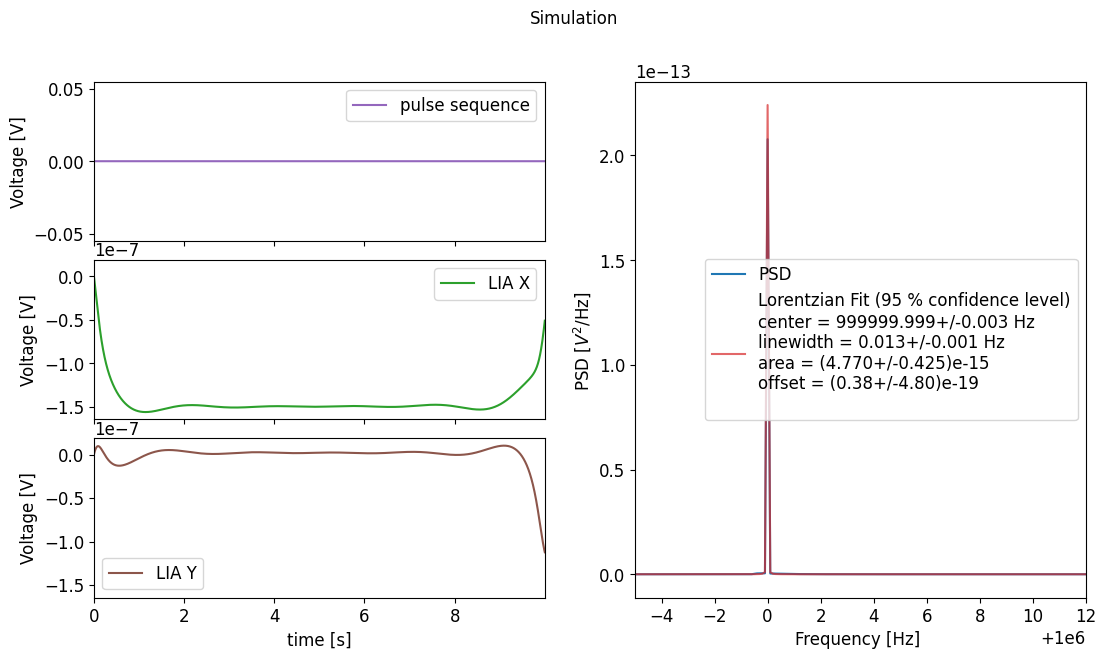

In [9]:
tau_a = 1e6 / np.abs(simu.excField.nu + simu.demodfreq)
check(tau_a)
check(1/(np.pi * np.sqrt(simu.sample.T2 * tau_a)))
simu.analyzeTrajectory()
specxaxis, spectrum, specxunit, specyunit = simu.trjryStream.GetSpectrum(
    showtimedomain=True,
    showfit=True,
    showresidual=False,
    showlegend=True,  # !!!!!show or not to show legend
    spectype="PSD",  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
    ampunit="V",
    specxunit="Hz",  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
    specxlim=[simu.demodfreq - 5 , simu.demodfreq + 12],
    # specylim=[0, 4e-23],
    specyscale="linear",  # 'log', 'linear'
    showstd=False,
    showplt_opt=True,
    return_opt=True,
)

c:\Users\zhenf\D\Yu0702\NMR-simulator\DataAnalysis.py line 4121 chunk_list : range(range(0, 1)) [len=1]


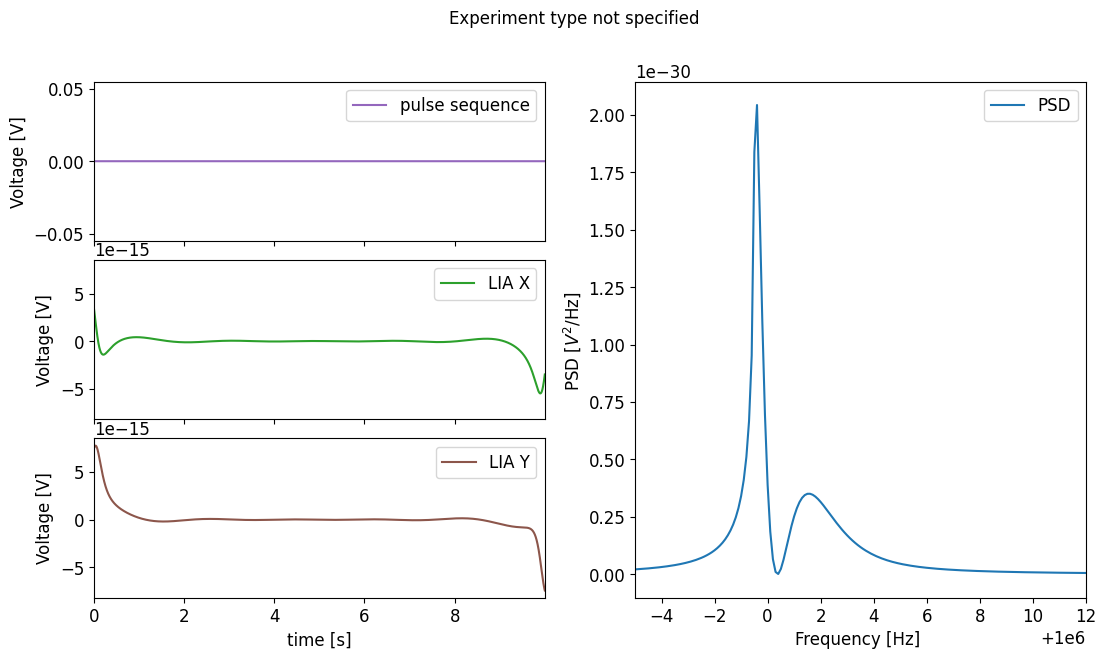

In [10]:
simu.analyzeB1()
specxaxis, B1spectrum, specxunit, specyunit = simu.B1Stream.GetSpectrum(
    # showtimedomain=True,
    showfit=False,
    spectype="PSD",  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
    ampunit="V",
    specxlim=[simu.demodfreq - 5, simu.demodfreq + 12],
    return_opt=True,
    showplt_opt=True,
)